## Observations and Insights 

More number of mice were treated with Capomulin and Ramicane. 
The treatments were done in almsot same number of male and female mice, the male count being only 2% more than females.

###### Capomulin Treatment
Capomulin treatment shows the tumor volume was decreasing over time. Few of the cases were having slight increase in tumor volume during first 14 days, but it was reduced when the treatment was continued for 45 days.

###### Weight vs Tumor Volume
The tumor volume has a strong positive correlation of 0.84 with weight. 
The heavier the mouse, the higher the tumor volume.
For every one unit of increse in weight, the tumor volume increases by .95 times

###### Boxplot Analysis
Majority of the mice treated with Capomulin and Ramicane had a smaller tumor size which was around 38 - 45 mm3.
The potential outliers of these two drugs indicate that some of the mice had much smaller tumor size
The boxplot indicates that the mice trated with Infubinol and Ceftamin had the tumor size bigger. The volumes are much higher than the higher tumor volumes for those treated with Capomulin and Ramicare.

###### Summary Statistics
The average tumor size of the mice treated with Capomulin and Ramicare is smaller than all the other treatments.
The standard deviation, standard error and variance are smaller for the drugs Capomulin and Ramicane. 
The treatment with these two drugs are consistant than all the other drugs.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
# from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
mouse_study_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
mouse_study_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
no_of_mice = mouse_metadata["Mouse ID"].count()
print(f"Total number of mice: {no_of_mice}")

Total number of mice: 249


In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = pd.Series(mouse_study_data[mouse_study_data.duplicated(["Mouse ID","Timepoint"])]["Mouse ID"].unique())
print(f"The mice id(s) for duplicate Mouse ID,Timepoint : {duplicate_mice.values}")


# # Method 2 - Split the aboce command into multiple lines
# temp_df = mouse_study_data[mouse_study_data.duplicated(["Mouse ID","Timepoint"])]
# duplicate_df = temp_df["Mouse ID"].unique()
# duplicate_mice = pd.Series(duplicate_df)
# duplicate_mice

The mice id(s) for duplicate Mouse ID,Timepoint : ['g989']


In [7]:
# # Optional: Get all the data for the duplicate mouse ID. 
mouse_study_data[mouse_study_data[["Mouse ID", "Timepoint"]].duplicated(keep=False)]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# Method 1 - Extract rows other than the duplicating mouse ids
# mouse_study_data = mouse_study_data.loc[~mouse_study_data["Mouse ID"].isin (duplicate_mice)]
# mouse_study_data

# Method 2 - Get the index/indices of the rows that have the duplicating mouse ids 
getIndex = mouse_study_data[ mouse_study_data['Mouse ID'].isin (duplicate_mice) ].index
mouse_study_data.drop(getIndex , inplace=True)          # Drop the rows with the above indices

In [9]:
# Checking the number of mice in the clean DataFrame.
no_of_mice = mouse_study_data["Mouse ID"].unique()
print(f"The number of mice in the clean dataframe : {len(no_of_mice)}")

The number of mice in the clean dataframe : 248


## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

groupby_regimen = mouse_study_data.groupby("Drug Regimen")

summary_df = pd.DataFrame({
    "Mean" : groupby_regimen["Tumor Volume (mm3)"].mean(),
    "Median" : groupby_regimen["Tumor Volume (mm3)"].median(),
    "StdDev" : groupby_regimen["Tumor Volume (mm3)"].std(),
    "Variance" : groupby_regimen["Tumor Volume (mm3)"].var(),
    "SEM" : groupby_regimen["Tumor Volume (mm3)"].sem(),
})
summary_df


,Mean,Median,StdDev,Variance,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

groupby_regimen = mouse_study_data.groupby('Drug Regimen')
aggregate_df = groupby_regimen["Tumor Volume (mm3)"].agg(['mean', 'median', 'std', 'var', 'sem'])
aggregate_df


,mean,median,std,var,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


## Bar and Pie Charts

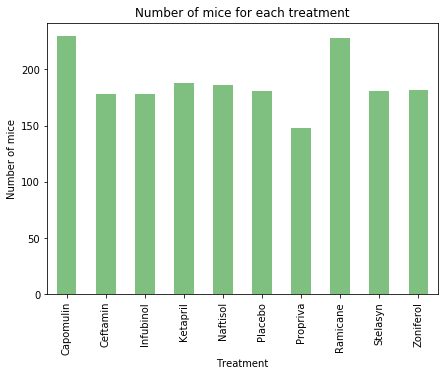

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

# Extract the drug/treatment names
treatment_mice_count = mouse_study_data.groupby("Drug Regimen")["Mouse ID"].count()

# Plot the bar chart
treat_mice_plot =  treatment_mice_count.plot(kind="bar", color="green", alpha=0.5, figsize=(7,5))
# Set the x-axis label
treat_mice_plot.set_xlabel("Treatment")
treat_mice_plot.set_title("Number of mice for each treatment")
# Set the y-axis label
treat_mice_plot.set_ylabel("Number of mice")
plt.show()

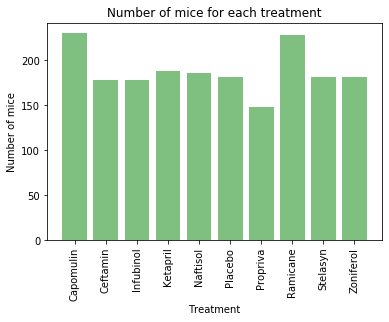

In [13]:
# Generate a bar plot showing the total number of mice for each treatment throughout 
# the course of the study using pyplot.

treat_mice_count = mouse_study_data.groupby("Drug Regimen")["Mouse ID"].count()
treatments = treat_mice_count.index

plt.title("Number of mice for each treatment")
plt.xlabel("Treatment")
plt.ylabel("Number of mice")

plt.bar(treatments, treat_mice_count, color="green", alpha=0.5, align="center")
plt.xticks(rotation=90)
plt.show()

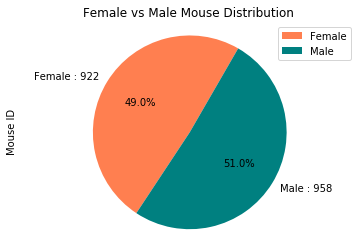

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_count = mouse_study_data.groupby("Sex")["Mouse ID"].count()

# Labels for each section
labels = [(mouse_count.index[0] + " : " + str(mouse_count.values[0])) , (mouse_count.index[1] + " : " + str(mouse_count.values[1]))]

# Colors for each section of the pie chart
colors = ["coral", "teal"]

# Legend for the pie chart
legend =  mouse_count.index

# Plot the pie chart
mouse_count.plot(kind="pie", labels=labels, colors=colors, autopct="%1.1f%%", startangle=60, title="Female vs Male Mouse Distribution")
plt.legend(legend)
plt.axis("equal")
plt.show()

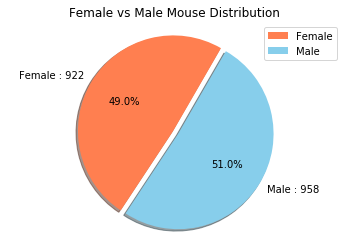

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Labels for each section
labels = [(mouse_count.index[0] + " : " + str(mouse_count.values[0])) , (mouse_count.index[1] + " : " + str(mouse_count.values[1]))]

# Colors for each section of the pie chart
colors = ["coral", "skyblue"]

# Legend for the pie chart
legend =  mouse_count.index

# Plot the pie chart
plt.pie(mouse_count, labels=labels, colors=colors, autopct="%1.1f%%", startangle=60, explode=(0,0.06), shadow=True)
plt.axis("equal")
plt.legend(legend, loc="upper right")
plt.startangle=80
plt.title("Female vs Male Mouse Distribution")
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_names = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
mouse_treat_df = mouse_study_data.loc[mouse_study_data["Drug Regimen"].isin(drug_names)]

# Start by getting the last (greatest) timepoint for each mouse
# Get the last/max timepoint for each mouse 
timepoint_df = mouse_treat_df.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
drug_time_merge_df = pd.merge(timepoint_df , mouse_treat_df, on=["Mouse ID","Timepoint"], how="inner")
# Display the merged data
drug_time_merge_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
drug_names = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumorvol_list = []

# Extract the tumor volume for each drug treatment
for eachdrug in drug_names:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_tvolume = mouse_study_data.loc[mouse_study_data["Drug Regimen"] == eachdrug]["Tumor Volume (mm3)"]
        
    # add subset 
    tumorvol_list.append(drug_tvolume)

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = drug_tvolume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = drug_tvolume.loc[(drug_tvolume < lower_bound) | (drug_tvolume > upper_bound)]
    
    formatquartile = (f"[ {'{:.3f}'.format(lowerq)}     {'{:.3f}'.format(quartiles[.5])}    {'{:.3f}'.format(upperq)} ]")
    # Display the results
    print(f"\n{eachdrug}")
    print(f"   Number of observatios  : {len(drug_tvolume)}")
    print(f"   Quartile Values  : {formatquartile} ,  IQR : {'{:.3f}'.format(iqr)}")
    print(f"   Outlier Boudaries : {'{:.3f}'.format(lower_bound)}  and  {'{:.3f}'.format(upper_bound)}")
    if len(outliers) == 0:
        print(f"   Potential Outliers for {eachdrug} :  None")    
    else:
        print(f"   Potential Outliers for {eachdrug} :  {outliers.values}")       


Capomulin
   Number of observatios  : 230
   Quartile Values  : [ 37.686     41.558    45.000 ] ,  IQR : 7.314
   Outlier Boudaries : 26.715  and  55.971
   Potential Outliers for Capomulin :  [25.47214326 23.34359787]

Ramicane
   Number of observatios  : 228
   Quartile Values  : [ 36.675     40.673    45.000 ] ,  IQR : 8.325
   Outlier Boudaries : 24.187  and  57.488
   Potential Outliers for Ramicane :  [22.05012627]

Infubinol
   Number of observatios  : 178
   Quartile Values  : [ 47.312     51.821    57.314 ] ,  IQR : 10.002
   Outlier Boudaries : 32.309  and  72.318
   Potential Outliers for Infubinol :  None

Ceftamin
   Number of observatios  : 178
   Quartile Values  : [ 47.208     51.776    56.801 ] ,  IQR : 9.593
   Outlier Boudaries : 32.819  and  71.191
   Potential Outliers for Ceftamin :  None


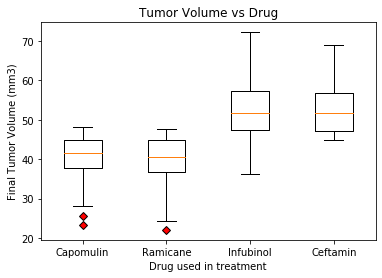

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
mark_outlier = dict(markerfacecolor='r', marker='D')
labels = drug_names
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume vs Drug')
ax1.set_xlabel('Drug used in treatment')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumorvol_list, labels=labels, flierprops=mark_outlier)
plt.show()

## Line and Scatter Plots

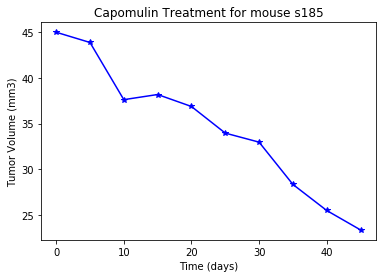

In [19]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin_df = mouse_study_data.loc[mouse_study_data["Drug Regimen"]=="Capomulin"]
get_miceids = Capomulin_df["Mouse ID"].unique()
# mouse_id = Capomulin_df.iloc[0,0]
mouse_id = get_miceids[0]
t_volume = Capomulin_df.loc[Capomulin_df["Mouse ID"]==mouse_id] 
plt.plot(t_volume["Timepoint"], t_volume["Tumor Volume (mm3)"], color='b', marker='*')
plt.title("Capomulin Treatment for mouse " + mouse_id)
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

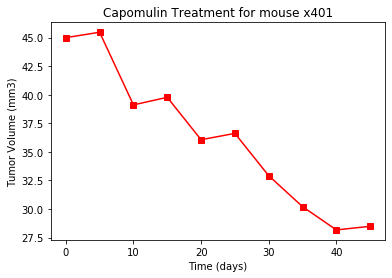

In [20]:
# mouse_id = Capomulin_df.iloc[10,0]
mouse_id = get_miceids[1]
t_volume = Capomulin_df.loc[Capomulin_df["Mouse ID"]==mouse_id] 
plt.plot(t_volume["Timepoint"], t_volume["Tumor Volume (mm3)"], color='r', marker='s')
plt.title("Capomulin Treatment for mouse " + mouse_id)
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

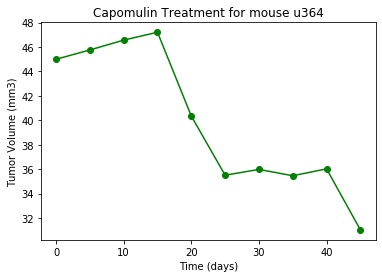

In [21]:
# mouse_id = Capomulin_df.iloc[35,0]
mouse_id = get_miceids[4]
t_volume = Capomulin_df.loc[Capomulin_df["Mouse ID"]==mouse_id] 
plt.plot(t_volume["Timepoint"], t_volume["Tumor Volume (mm3)"], color='g', marker='o')
plt.title("Capomulin Treatment for mouse " + mouse_id)
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

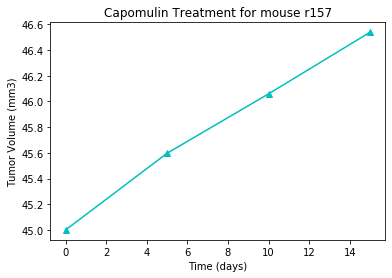

In [22]:
count = len(get_miceids)
mouse_id = get_miceids[count-1]
t_volume = Capomulin_df.loc[Capomulin_df["Mouse ID"]==mouse_id] 
plt.plot(t_volume["Timepoint"], t_volume["Tumor Volume (mm3)"], color="c", marker='^')
plt.title("Capomulin Treatment for mouse " + mouse_id)
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

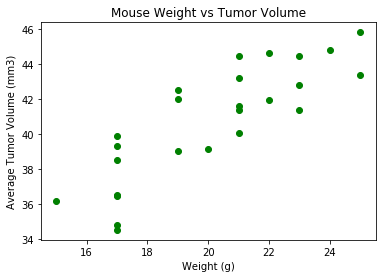

In [23]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
 
avg_tvolume = Capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
merge_df = pd.merge(mouse_metadata, avg_tvolume, on="Mouse ID", how="inner")

x_axis = merge_df["Weight (g)"]
y_axis = merge_df["Tumor Volume (mm3)"]
plt.scatter(x_axis, y_axis, color='g')
plt.title("Mouse Weight vs Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.savefig("Weight_vs_Volume.jpg")
plt.show()

## Correlation and Regression

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight = merge_df["Weight (g)"]
t_volume = merge_df["Tumor Volume (mm3)"]
correlation = sts.pearsonr(weight,t_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


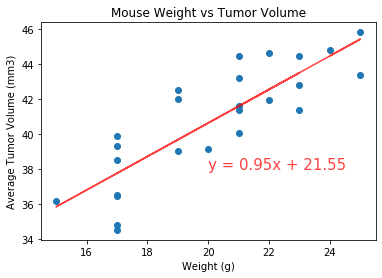

In [25]:
# Add the linear regression equation and line to plot

x_values = merge_df["Weight (g)"]
y_values = merge_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-", alpha=0.75)
plt.annotate(line_eq,(20,38),fontsize=15, color="red", alpha=0.75)
plt.title("Mouse Weight vs Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.savefig("Regression-plot.jpg")
plt.show()